In [1]:
# Required Modules

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# Loading and preprocessing data 

In [2]:
data = pd.read_csv('data.csv', index_col='Date')
data.index = pd.to_datetime(data.index)
data.dropna(inplace=True)
print(data.head())

                 SBIN    HDFCBANK       CANBK    YESBANK  BANKBARODA  \
Date                                                                   
2010-01-04  95.066895  132.501434  322.703156  34.458496   51.206989   
2010-01-05  95.102180  132.617950  328.367096  34.965523   52.686508   
2010-01-06  95.672699  132.707291  329.985016  34.471333   53.009216   
2010-01-07  95.137444  133.052963  332.695953  33.887291   53.326965   
2010-01-08  94.853218  133.227722  328.124237  33.726841   53.540455   

            ICICIBANK  
Date                   
2010-01-04  85.319977  
2010-01-05  86.130264  
2010-01-06  86.789574  
2010-01-07  85.970222  
2010-01-08  84.762535  


# Exploratory Data Analysis

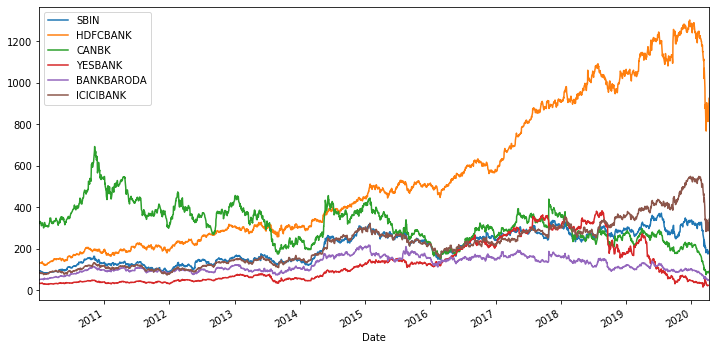

In [3]:
data.plot()

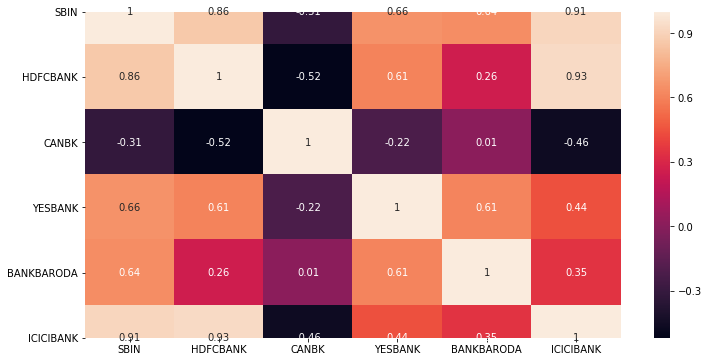

In [4]:
# Correlation Matrix

sns.heatmap(data.corr(), annot=True)

In [5]:
num_stocks = len(data.columns)

In [6]:
# calculate daily returns
daily_ret = data.pct_change()

# Resample to the first of the month
monthly = data.resample('BMS').first()

monthly_ret = monthly.pct_change()

In [7]:
# calculating daily covariance of stocks (for a monthly period)

daily_covar = {}
daily_index = daily_ret.index

for date in monthly_ret.index:
    # mask all the months except the current month and year in the date
    mask = (date.month == daily_index.month) & (date.year == daily_index.year)
    daily_covar[date] = daily_ret[mask].cov()
    
print(daily_covar[date])

                SBIN  HDFCBANK     CANBK   YESBANK  BANKBARODA  ICICIBANK
SBIN        0.002690  0.002802  0.001859 -0.000454    0.001348   0.004546
HDFCBANK    0.002802  0.003125  0.001573 -0.000547    0.001063   0.004737
CANBK       0.001859  0.001573  0.002004 -0.000020    0.001495   0.003269
YESBANK    -0.000454 -0.000547 -0.000020  0.000677   -0.000510  -0.000447
BANKBARODA  0.001348  0.001063  0.001495 -0.000510    0.001701   0.002139
ICICIBANK   0.004546  0.004737  0.003269 -0.000447    0.002139   0.007907


In [8]:
portfolio_weights = {}
portfolio_returns = {}
portfolio_volatility = {}

# get Portfolio Performance at each month
for date in daily_covar.keys():
    for _ in range(5000):
        weights = np.random.random(num_stocks)
        weights /= np.sum(weights)
        
        returns = np.dot(weights, monthly_ret.loc[date])
        volatility = np.dot(weights.T, np.dot(daily_covar[date], weights))
        
        portfolio_weights.setdefault(date, []).append(weights)
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)

Text(0, 0.5, 'Returns')

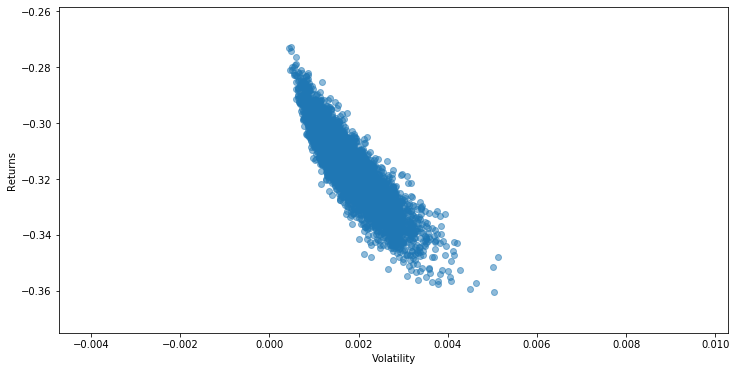

In [9]:
# plotting the efficient frontier curve for the most recent month
date = sorted(daily_covar.keys())[-1]

plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date], alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [10]:
sharpe_ratio, max_sharpe_ratio = {}, {}

# getting sharpe and max sharpe ratio's for a month
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
        volatility = portfolio_volatility[date][i]
        sharpe_ratio.setdefault(date, []).append(ret / volatility)

    max_sharpe_ratio[date] = np.argmax(sharpe_ratio[date])

Text(0, 0.5, 'Returns')

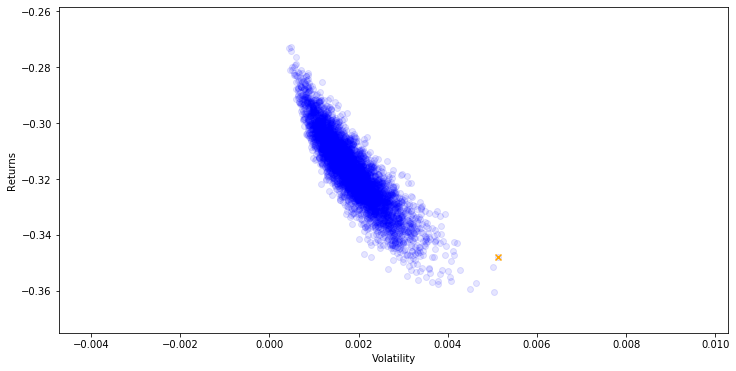

In [11]:
# plotting efficient frontier with maximum sharpe ratio

date = sorted(daily_covar.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]
best_idx = max_sharpe_ratio[date]


plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
plt.scatter(cur_volatility[best_idx], cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')